# Rephrase the following questions:

Is the website redesign any good?

- Is this website redesign capturing more visitors and causing more click throughs per visit/day?

Is our television ad driving more sales?

- Is the television ad generating additional new business, causing an increase from our existing business, or not causing any favorable change.

Has the network latency gone up since we switched internet service providers?

- Since we switched internet service providers are there particular issues that exist now with network latency which never existed before? Has previously known network latency improved or remained the same since the switch to the new internet service provider?

# Hypothesis Testing Overview Exercises

- Is the website redesign any good?

Null Hypothesis: Average number of 3,000 visitors per day remained the same since the webiste redesign.

Alternative Hypothesis: The average number of 3,000 website visitors per day has changed (improved or declined) since the website redesign.

True Positive: Reject the Null Hypothesis and visitors numbers were different then mean.

True Negative: Fail to reject Null Hypothesis and number of visitors stayed the same.

Type I Error: Reject the Null Hypothesis and sure enough the mean number of visitors has not changed.

Type II Error: Fail to reject the Null Hypothesis and the number of visitors did change since the website redesign. 

- Is our television ad driving more sales?

Null Hypothesis: There is no difference in sales from television advertising nor is the television ad driving changes in sales.

Alternative Hypothesis: Television advertising leads to increase of previous sales.

True Positive: Reject the Null Hypothesis and the television ad does change sales

True Negative: Fail to reject Null Hypothesis, so you accept the Null and it turns out that sales have not changed because of the televison ad.

Type I Error: Reject the Null Hypothesis and sales never changed 

Type II Error: Fail to reject the Null Hypothesis and the sales have changed.

- Has the network latency gone up since we switched internet service providers?

Null Hypothesis: The amount of network latency has not changed since switching internet service providers.

Alternative Hypothesis: Since switching internet network providers, network latency is greater than before during peak hours.

True Positive: Reject the Null Hypothesis and you were right that the network latency was affected since the switch.

True Negative: Fail to reject Null Hypothesis you accept the Null when you the Null is true (no change).

Type I Error: Reject the Null Hypothesis and then realize your Null was true (no change) after rejecting

Type II Error: Fail to reject the Null Hypothesis by accepting and realize that the Null was wrong because the amount of network latency did change since the switch.

# Hypothesis Testing T-Test Exercises

- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [4]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
office_mean_1 = 90
office_mean_2 = 100

n1 = 40
n2 = 50

std_1 = 15
std_2 = 20

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * std_1**2 + (n2 - 1) * std_2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(std_1**2 / n1 + std_2**2 / n2)

t = (office_mean_1 - office_mean_2) / (s_p * sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [14]:
p = stats.t(degf).cdf(t) * 2
p

1.9897901475507607

- We'll reject the Null Hypothesis for the example above.

In [4]:
from pydataset import data
# Load the mpg dataset and use it to answer the following questions:

In [5]:
mpg = data('mpg')

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

    Null Hypothesis: There is no difference in fuel-efficiency between cars from 2008 and cars from 1999.

In [10]:
mpg.year.value_counts()

2008    117
1999    117
Name: year, dtype: int64

In [13]:
mpg['average_mileage'] = (mpg['cty'] + mpg['hwy']) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [16]:
mileage_by_year = mpg[['year', 'average_mileage']].groupby('year').mean()
mileage_by_year

,average_mileage
year,
1999,20.222222
2008,20.076923


In [59]:
stats.ttest_ind(year_2008, year_1999)

Ttest_indResult(statistic=-0.5674988409997608, pvalue=0.5709240495406107)

- Are compact cars more fuel-efficient than the average car?

    Null Hypothesis: There is no difference in fuel-efficiency between compact cars and an average car. 
    
    We would reject the Null Hypothesis because the p-value is lower than .05

In [11]:
compact_mileage = mpg[mpg['class'] == 'compact'].cty
midsize_mileage = mpg[mpg['class'] == 'midsize'].cty

In [13]:
stats.ttest_ind(compact_mileage, midsize_mileage)

Ttest_indResult(statistic=2.2845195147123536, pvalue=0.024803276085898066)

- Do manual cars get better gas mileage than automatic cars?

    Null Hypothesis: Manual transmission cars and automatic transmission cars have the same mileage as the overall population

    Alternative Hypothesis: Automatic transmission cars do not have the same mileage as the overall population
    
    We would reject the Null Hypothesis

In [19]:
mpg = data('mpg')
mpg.trans = mpg.trans.str[:-4]

In [26]:
manual_city_mileage = mpg[mpg.trans == 'manual'].cty

In [22]:
automatic_city_mileage = mpg[mpg.trans == 'auto'].cty

In [28]:
stats.ttest_ind(manual_city_mileage, automatic_city_mileage)

Ttest_indResult(statistic=4.781718413818975, pvalue=3.088973514167085e-06)

# Hypothesis Testing Correlation Exercises

- Use the telco_churn data. Does tenure correlate with monthly charges?

In [5]:
def get_db_url(user, password, host, database_name):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url

import env

from env import host, user, password

url = get_db_url(user,password, host, "telco_churn")

url

query = "SELECT * FROM customers"
customers = pd.read_sql(query, url)
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [20]:
customers = customers[customers['monthly_charges'].notnull()]

r = 0.2479
p = 4.0940449915016345e-99


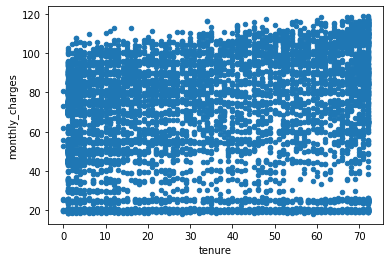

In [22]:
x = customers.tenure
y = customers.monthly_charges

r, p = stats.pearsonr(x,y)
customers.plot.scatter(x = "tenure", y = "monthly_charges")
print(f'r = {r:.4}')
print(f'p = {p}')

- Does tenure correlate with total charges?

In [45]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

floats_only = customers.total_charges.apply(isfloat)

x = customers[floats_only].tenure
y = customers[floats_only].total_charges.apply(float)

stats.pearsonr(x,y)

(0.825880460933202, 0.0)

- What happens if you control for phone and internet service?

In [32]:
has_internet = customers.internet_service_type_id > 1
has_phone = customers.phone_service == 'Yes'

In [36]:
r, p = stats.pearsonr(has_phone,has_internet)
print(f'r = {r:.4}')
print(f'p = {p}')

r = 0.4524
p = 0.0


- Use the employees database

In [7]:
def get_db_url(user, password, host, database_name):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url

import env

from env import host, user, password

url = get_db_url(user,password, host, "employees")

url

query = '''
SELECT datediff(curdate(), employees.hire_date) as tenure,
    salary
    FROM employees
    JOIN salaries USING(emp_no)
    WHERE salaries.to_date LIKE "9999%%";
'''
salaries = pd.read_sql(query, url)

- Is there a relationship between how long an employee has been with the company and their salary?

In [68]:
salaries.head()

,tenure,salary
0,12157,88958
1,12374,72527
2,12094,43311
3,11999,74057
4,10983,94692


In [69]:
stats.pearsonr(salaries['tenure'],salaries['salary'])

(0.30646256131860766, 0.0)

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [75]:
query = '''
SELECT datediff(curdate(), employees.hire_date) as tenure,
    count(title) as titles
    FROM employees
    JOIN titles USING(emp_no)
    GROUP BY emp_no;
'''
titles = pd.read_sql(query, url)

In [76]:
titles.head()

,tenure,titles
0,12157,1
1,12374,1
2,12094,1
3,11999,2
4,10983,2


In [78]:
titles['tenure'] = titles['tenure'] - titles['tenure'].min()

In [80]:
stats.pearsonr(titles['tenure'], titles['titles'])

(0.26659892991366185, 0.0)

- Use the sleepstudy data. Is there a relationship between days and reaction time?

In [71]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [74]:
stats.pearsonr(sleep['Days'], sleep['Reaction'])

(0.5352302262650253, 9.894096322214812e-15)

In [84]:
.13*298

38.74

# Chi Square Exercises

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                                Codeup        Not
                                Student       Codeup Student
        Uses a Macbook            49           20
        Doesn't Usee a Macbook    01           30


In [86]:
index = ['Macbook', 'Not Macbook']
columns = ['Codeup', 'Not Codeup']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)

In [91]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
             Codeup  Not Codeup
Macbook          49          20
Not Macbook       1          30
---
Expected
[[34.5 34.5]
 [15.5 15.5]]
chi^2 = 36.6526
p     = 0.0000


- Choose another 2 categorical variables from the mpg dataset and perform a chi^2 contingency table test with them. Be sure to state your null and alternative hypotheses.

Null Hypothesis: The type of transmission has no relationship to the manufacturer.

Alternative Hypothesis: There is a relationship between transmission type and manufacturer.

The p-value is less than .05 so we will reject the Null Hypothesis.

In [11]:
mpg = data('mpg')
mpg['transmission'] = mpg.trans.str[:-4]
mpg.manufacturer.nunique()

15

In [15]:
cross = pd.crosstab(mpg.manufacturer, mpg.transmission)
cross

transmission,auto,manual
manufacturer,,
audi,11,7
chevrolet,16,3
dodge,30,7
ford,17,8
honda,4,5
hyundai,7,7
jeep,8,0
land rover,4,0
lincoln,3,0


In [17]:
chi2, p, degf, expected = stats.chi2_contingency(cross)
print('Observed')
print(cross)
print('---\nExpected')
print(expected)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
transmission  auto  manual
manufacturer              
audi            11       7
chevrolet       16       3
dodge           30       7
ford            17       8
honda            4       5
hyundai          7       7
jeep             8       0
land rover       4       0
lincoln          3       0
mercury          4       0
nissan           8       5
pontiac          5       0
subaru           7       7
toyota          20      14
volkswagen      13      14
---
Expected
[[12.07692308  5.92307692]
 [12.74786325  6.25213675]
 [24.82478632 12.17521368]
 [16.77350427  8.22649573]
 [ 6.03846154  2.96153846]
 [ 9.39316239  4.60683761]
 [ 5.36752137  2.63247863]
 [ 2.68376068  1.31623932]
 [ 2.01282051  0.98717949]
 [ 2.68376068  1.31623932]
 [ 8.72222222  4.27777778]
 [ 3.35470085  1.64529915]
 [ 9.39316239  4.60683761]
 [22.81196581 11.18803419]
 [18.11538462  8.88461538]]
chi^2 = 29.2937
p     = 0.0095


- Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Null Hypothesis: An employee's gender is independent as to whether or not they work in the sales or marketing departments.
    
Alternative Hypothesis: There is a dependency between an employee's gender and whether they work in the sales or marketing departments.

The p-value is greater than .05 so you fail to reject the Null Hypothesis so there is independence.

In [8]:
def get_db_url(user, password, host, database_name):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url

import env

from env import host, user, password

url = get_db_url(user,password, host, "employees")

url

query = '''
SELECT gender, dept_name
    FROM employees
    JOIN dept_emp USING(emp_no)
    JOIN departments USING(dept_no)
    WHERE dept_emp.to_date LIKE "9999%%";
'''
gender = pd.read_sql(query, url)

In [22]:
gender.shape[0]

240124

In [25]:
gender.head()

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service


In [9]:
two_departments = gender['dept_name'].apply(lambda x: x in ['Marketing', 'Sales'])

In [41]:
index_gender = gender[two_departments]
index_gender.shape[0]


52543

In [42]:
cross_tab = pd.crosstab(index_gender.dept_name, index_gender.gender)
cross_tab

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [43]:
stats.chi2_contingency(cross_tab)

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013,  8948.7573987],
        [14969.7573987, 22731.2426013]]))

Is an employee's gender independent of whether or not they are or have been a manager?

In [44]:
query = '''
SELECT
    employees.emp_no IN (SELECT emp_no FROM dept_manager) as is_manager,
    employees.gender
FROM employees
'''

employees = pd.read_sql(query, url)

In [46]:
employees.is_manager.value_counts()

0    300000
1        24
Name: is_manager, dtype: int64

In [47]:
stats.chi2_contingency(pd.crosstab(employees.is_manager, employees.gender))

(1.4566857643547197,
 0.22745818732810363,
 1,
 array([[1.20041397e+05, 1.79958603e+05],
        [9.60331174e+00, 1.43966883e+01]]))

Null Hypothesis: An employee's gender is independent from whether they are or have been a manager.
    
Alternative Hypothesis: There is a dependency between an employee's gender and whether they are or have been a manager.

Because the p-value is greater than .05 you would fail to reject the Null Hypothesis.